In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import os
import numpy as np
import matplotlib.pyplot as plt
# import nibabel as nib
import cortex

# Displaying noise ceiling values for all voxels

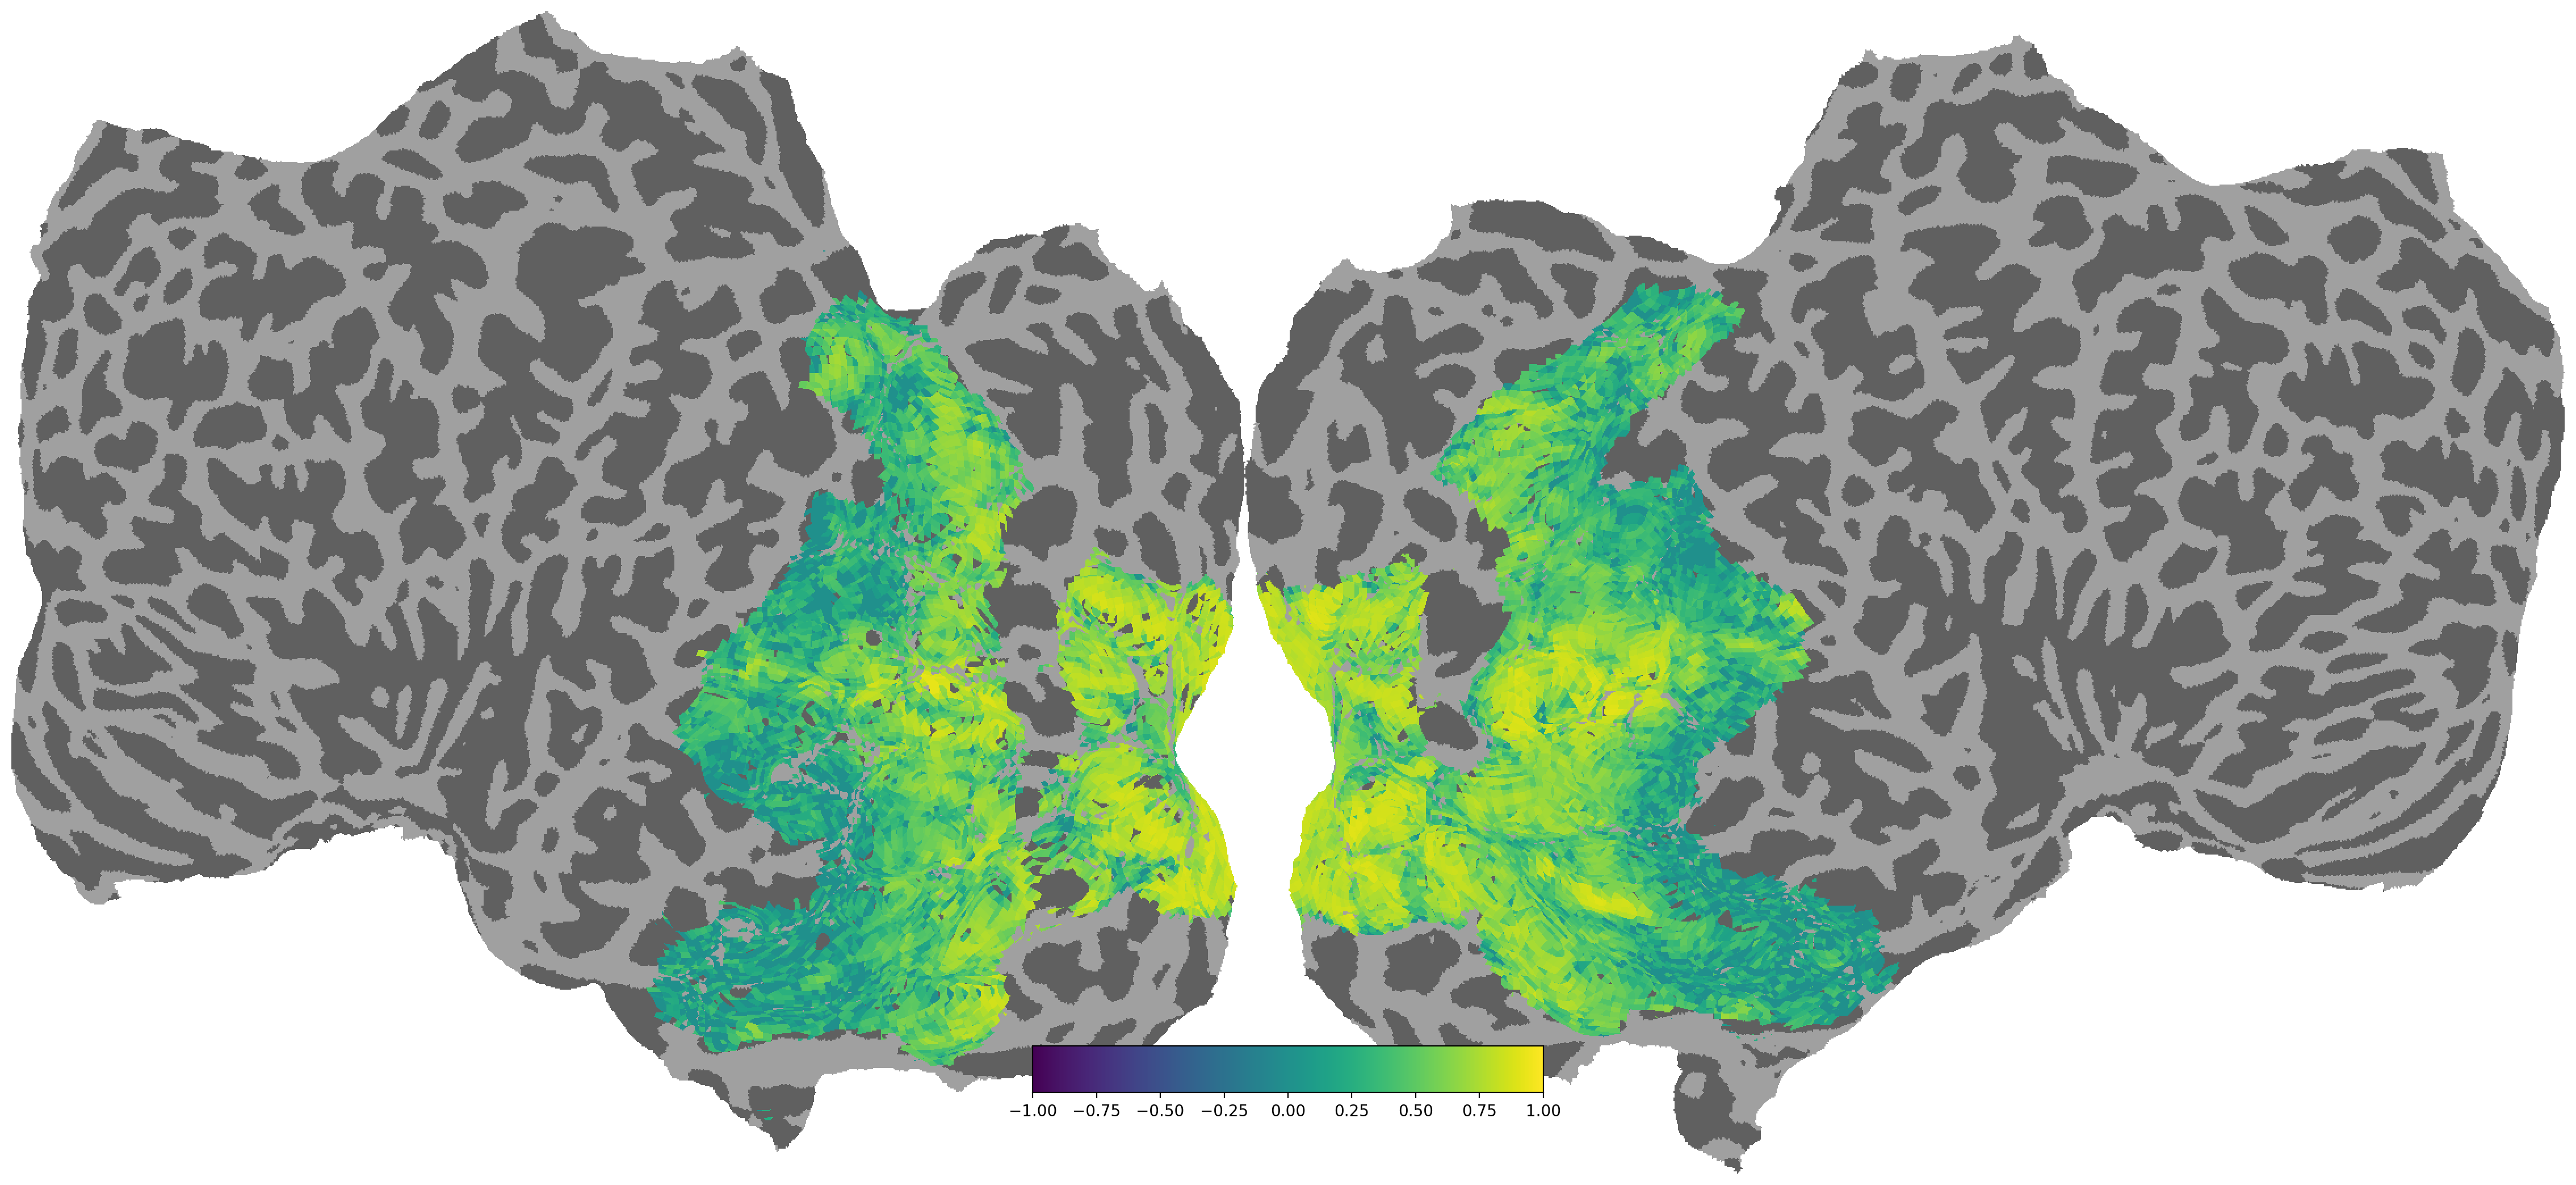

In [22]:
subj = 1
subject = "subj%02d"%subj
xfm = 'func1pt8_to_anat0pt8_autoFSbbr' 

basic_mask = np.load('data/masks/subj%d/cortical_mask_subj%02d.npy'%(subj, subj)) 
streams_mask = np.load('data/masks/subj%d/roi_1d_mask_subj%02d_streams.npy'%(subj, subj)) 
cortical_mask = np.load('data/masks/subj%d/cortical_mask_subj%02d.npy'%(subj, subj)) 


data_val = np.zeros(streams_mask.shape)
data_val[:] = np.nan
nc01 = np.load('data/lateral_visual_data/nc_01.npy')
data_val[streams_mask == 6] = nc01 # 1: <=0 nc, 2: 'bad', 3: 'good'
nc01 = np.load('data/ventral_visual_data/nc_01.npy')
data_val[streams_mask == 5] = nc01 # 1: <=0 nc, 2: 'bad', 3: 'good'
nc01 = np.load('data/dorsal_visual_data/nc_01.npy')
data_val[streams_mask == 7] = nc01 # 1: <=0 nc, 2: 'bad', 3: 'good'



roi = 1 ## 1: V1v, 2: V1d, 3: V2v, 4: V2d, 5: V3v, 6: V3d, and 7: hV4
visualrois_mask = np.load('data/masks/subj%d/roi_1d_mask_subj%02d_prf-visualrois.npy'%(subj, subj))
nc01 = np.load('data/V1v_data/nc_01.npy')
data_val[visualrois_mask == roi] = nc01

roi = 2 ## 1: V1v, 2: V1d, 3: V2v, 4: V2d, 5: V3v, 6: V3d, and 7: hV4
visualrois_mask = np.load('data/masks/subj%d/roi_1d_mask_subj%02d_prf-visualrois.npy'%(subj, subj))
nc01 = np.load('data/V1d_data/nc_01.npy')
data_val[visualrois_mask == roi] = nc01

roi = 3 ## 1: V1v, 2: V1d, 3: V2v, 4: V2d, 5: V3v, 6: V3d, and 7: hV4
visualrois_mask = np.load('data/masks/subj%d/roi_1d_mask_subj%02d_prf-visualrois.npy'%(subj, subj))
nc01 = np.load('data/V2v_data/nc_01.npy')
data_val[visualrois_mask == roi] = nc01

roi = 4 ## 1: V1v, 2: V1d, 3: V2v, 4: V2d, 5: V3v, 6: V3d, and 7: hV4
visualrois_mask = np.load('data/masks/subj%d/roi_1d_mask_subj%02d_prf-visualrois.npy'%(subj, subj))
nc01 = np.load('data/V2d_data/nc_01.npy')
data_val[visualrois_mask == roi] = nc01

roi = 5 ## 1: V1v, 2: V1d, 3: V2v, 4: V2d, 5: V3v, 6: V3d, and 7: hV4
visualrois_mask = np.load('data/masks/subj%d/roi_1d_mask_subj%02d_prf-visualrois.npy'%(subj, subj))
nc01 = np.load('data/V3v_data/nc_01.npy')
data_val[visualrois_mask == roi] = nc01

roi = 6 ## 1: V1v, 2: V1d, 3: V2v, 4: V2d, 5: V3v, 6: V3d, and 7: hV4
visualrois_mask = np.load('data/masks/subj%d/roi_1d_mask_subj%02d_prf-visualrois.npy'%(subj, subj))
nc01 = np.load('data/V3d_data/nc_01.npy')
data_val[visualrois_mask == roi] = nc01

roi = 7 ## 1: V1v, 2: V1d, 3: V2v, 4: V2d, 5: V3v, 6: V3d, and 7: hV4
visualrois_mask = np.load('data/masks/subj%d/roi_1d_mask_subj%02d_prf-visualrois.npy'%(subj, subj))
nc01 = np.load('data/v4_data/nc_01.npy')
data_val[visualrois_mask == roi] = nc01

new_data_val = data_val.copy()

new_mask = np.zeros(cortical_mask.shape) 
new_mask[:] = np.nan
new_mask[basic_mask] = new_data_val.copy()
new_mask = np.transpose(new_mask, (2, 1, 0)) 
vol_data_nan = cortex.Volume(new_mask.copy(), subject, xfm, vmin = -1, vmax = 1, cmap="viridis", with_curvature = True, with_sulci = True)

fig = cortex.quickflat.make_figure(vol_data_nan, sampler='nearest', thick = 1,
                                       with_curvature=True,
                                       with_rois=False,
                                       with_labels=False,
                                      with_sulci=False)

plt.show()

# Comparison between various models (example - CLIP single and dense caption models)

## Getting values for all voxels (as training is done with ONLY valid noise celing voxels)

In [26]:
single_ventral = np.load('metrics/bv_ventral_visual_data_only_single_captions_0.001_clip_semantic_transformer.npy')
dense_ventral = np.load('metrics/bv_ventral_visual_data_only_dense_captions_clip_semantic_transformer.npy')
better_single = np.where(single_ventral > dense_ventral, 2, 3)
better_single_sub1 = better_single[:5931] ## Number of valid voxels
nc01 = np.load('data/ventral_visual_data/nc_01.npy')
valid_voxels_ids = np.array([i for i in range(len(nc01)) if nc01[i]>0])
voxel_splits_ventral = np.ones(nc01.shape)
voxel_splits_ventral[valid_voxels_ids] = better_single_sub1


single_dorsal = np.load('metrics/bv_dorsal_visual_data_only_single_captions_0.001_clip_semantic_transformer.npy')
dense_dorsal = np.load('metrics/bv_dorsal_visual_data_only_dense_captions_clip_semantic_transformer.npy')
better_single = np.where(single_dorsal > dense_dorsal, 2, 3)
better_single_sub1 = better_single[:3233]
nc01 = np.load('data/dorsal_visual_data/nc_01.npy')
valid_voxels_ids = np.array([i for i in range(len(nc01)) if nc01[i]>0])
voxel_splits_dorsal = np.ones(nc01.shape)
voxel_splits_dorsal[valid_voxels_ids] = better_single_sub1


single_lateral = np.load('metrics/bv_lateral_visual_data_only_single_captions_0.001_clip_semantic_transformer.npy')
dense_lateral = np.load('metrics/bv_lateral_visual_data_only_dense_captions_clip_semantic_transformer.npy')
better_single = np.where(single_lateral > dense_lateral, 2, 3)
better_single_sub1 = better_single[:6680]
nc01 = np.load('data/lateral_visual_data/nc_01.npy')
valid_voxels_ids = np.array([i for i in range(len(nc01)) if nc01[i]>0])
voxel_splits_lateral = np.ones(nc01.shape)
voxel_splits_lateral[valid_voxels_ids] = better_single_sub1

single_V1v = np.load('metrics/bv_V1v_data_only_single_captions_0.01_clip_semantic_transformer.npy')
dense_V1v = np.load('metrics/bv_V1v_data_only_dense_captions_clip_semantic_transformer.npy')
better_single = np.where(single_V1v > dense_V1v, 2, 3)
better_single_sub1 = better_single[:588]
nc01 = np.load('data/V1v_data/nc_01.npy')
valid_voxels_ids = np.array([i for i in range(len(nc01)) if nc01[i]>0])
voxel_splits_V1v = np.ones(nc01.shape)
voxel_splits_V1v[valid_voxels_ids] = better_single_sub1

single_V1d = np.load('metrics/bv_V1d_data_only_single_captions_0.01_clip_semantic_transformer.npy')
dense_V1d = np.load('metrics/bv_V1d_data_only_dense_captions_clip_semantic_transformer.npy')
better_single = np.where(single_V1d > dense_V1d, 2, 3)
better_single_sub1 = better_single[:747]
nc01 = np.load('data/V1d_data/nc_01.npy')
valid_voxels_ids = np.array([i for i in range(len(nc01)) if nc01[i]>0])
voxel_splits_V1d = np.ones(nc01.shape)
voxel_splits_V1d[valid_voxels_ids] = better_single_sub1

single_V2v = np.load('metrics/bv_V2v_data_only_single_captions_0.01_clip_semantic_transformer.npy')
dense_V2v = np.load('metrics/bv_V2v_data_only_dense_captions_clip_semantic_transformer.npy')
better_single = np.where(single_V2v > dense_V2v, 2, 3)
better_single_sub1 = better_single[:801]
nc01 = np.load('data/V2v_data/nc_01.npy')
valid_voxels_ids = np.array([i for i in range(len(nc01)) if nc01[i]>0])
voxel_splits_V2v = np.ones(nc01.shape)
voxel_splits_V2v[valid_voxels_ids] = better_single_sub1

single_V2d = np.load('metrics/bv_V2d_data_only_single_captions_0.01_clip_semantic_transformer.npy')
dense_V2d = np.load('metrics/bv_V2d_data_only_dense_captions_clip_semantic_transformer.npy')
better_single = np.where(single_V2d > dense_V2d, 2, 3)
better_single_sub1 = better_single[:587]
nc01 = np.load('data/V2d_data/nc_01.npy')
valid_voxels_ids = np.array([i for i in range(len(nc01)) if nc01[i]>0])
voxel_splits_V2d = np.ones(nc01.shape)
voxel_splits_V2d[valid_voxels_ids] = better_single_sub1

single_V3v = np.load('metrics/bv_V3v_data_only_single_captions_0.01_clip_semantic_transformer.npy')
dense_V3v = np.load('metrics/bv_V3v_data_only_dense_captions_clip_semantic_transformer.npy')
better_single = np.where(single_V3v > dense_V3v, 2, 3)
better_single_sub1 = better_single[:625]
nc01 = np.load('data/V3v_data/nc_01.npy')
valid_voxels_ids = np.array([i for i in range(len(nc01)) if nc01[i]>0])
voxel_splits_V3v = np.ones(nc01.shape)
voxel_splits_V3v[valid_voxels_ids] = better_single_sub1

single_V3d = np.load('metrics/bv_V3d_data_only_single_captions_0.01_clip_semantic_transformer.npy')
dense_V3d = np.load('metrics/bv_V3d_data_only_dense_captions_clip_semantic_transformer.npy')
better_single = np.where(single_V3d > dense_V3d, 2, 3)
better_single_sub1 = better_single[:531]
nc01 = np.load('data/V3d_data/nc_01.npy')
valid_voxels_ids = np.array([i for i in range(len(nc01)) if nc01[i]>0])
voxel_splits_V3d = np.ones(nc01.shape)
voxel_splits_V3d[valid_voxels_ids] = better_single_sub1

single_v4 = np.load('metrics/bv_v4_data_only_single_captions_0.01_clip_semantic_transformer.npy')
dense_v4 = np.load('metrics/bv_v4_data_only_dense_captions_clip_semantic_transformer.npy')
better_single = np.where(single_v4 > dense_v4, 2, 3)
better_single_sub1 = better_single[:661]
nc01 = np.load('data/v4_data/nc_01.npy')
valid_voxels_ids = np.array([i for i in range(len(nc01)) if nc01[i]>0])
voxel_splits_v4 = np.ones(nc01.shape)
voxel_splits_v4[valid_voxels_ids] = better_single_sub1

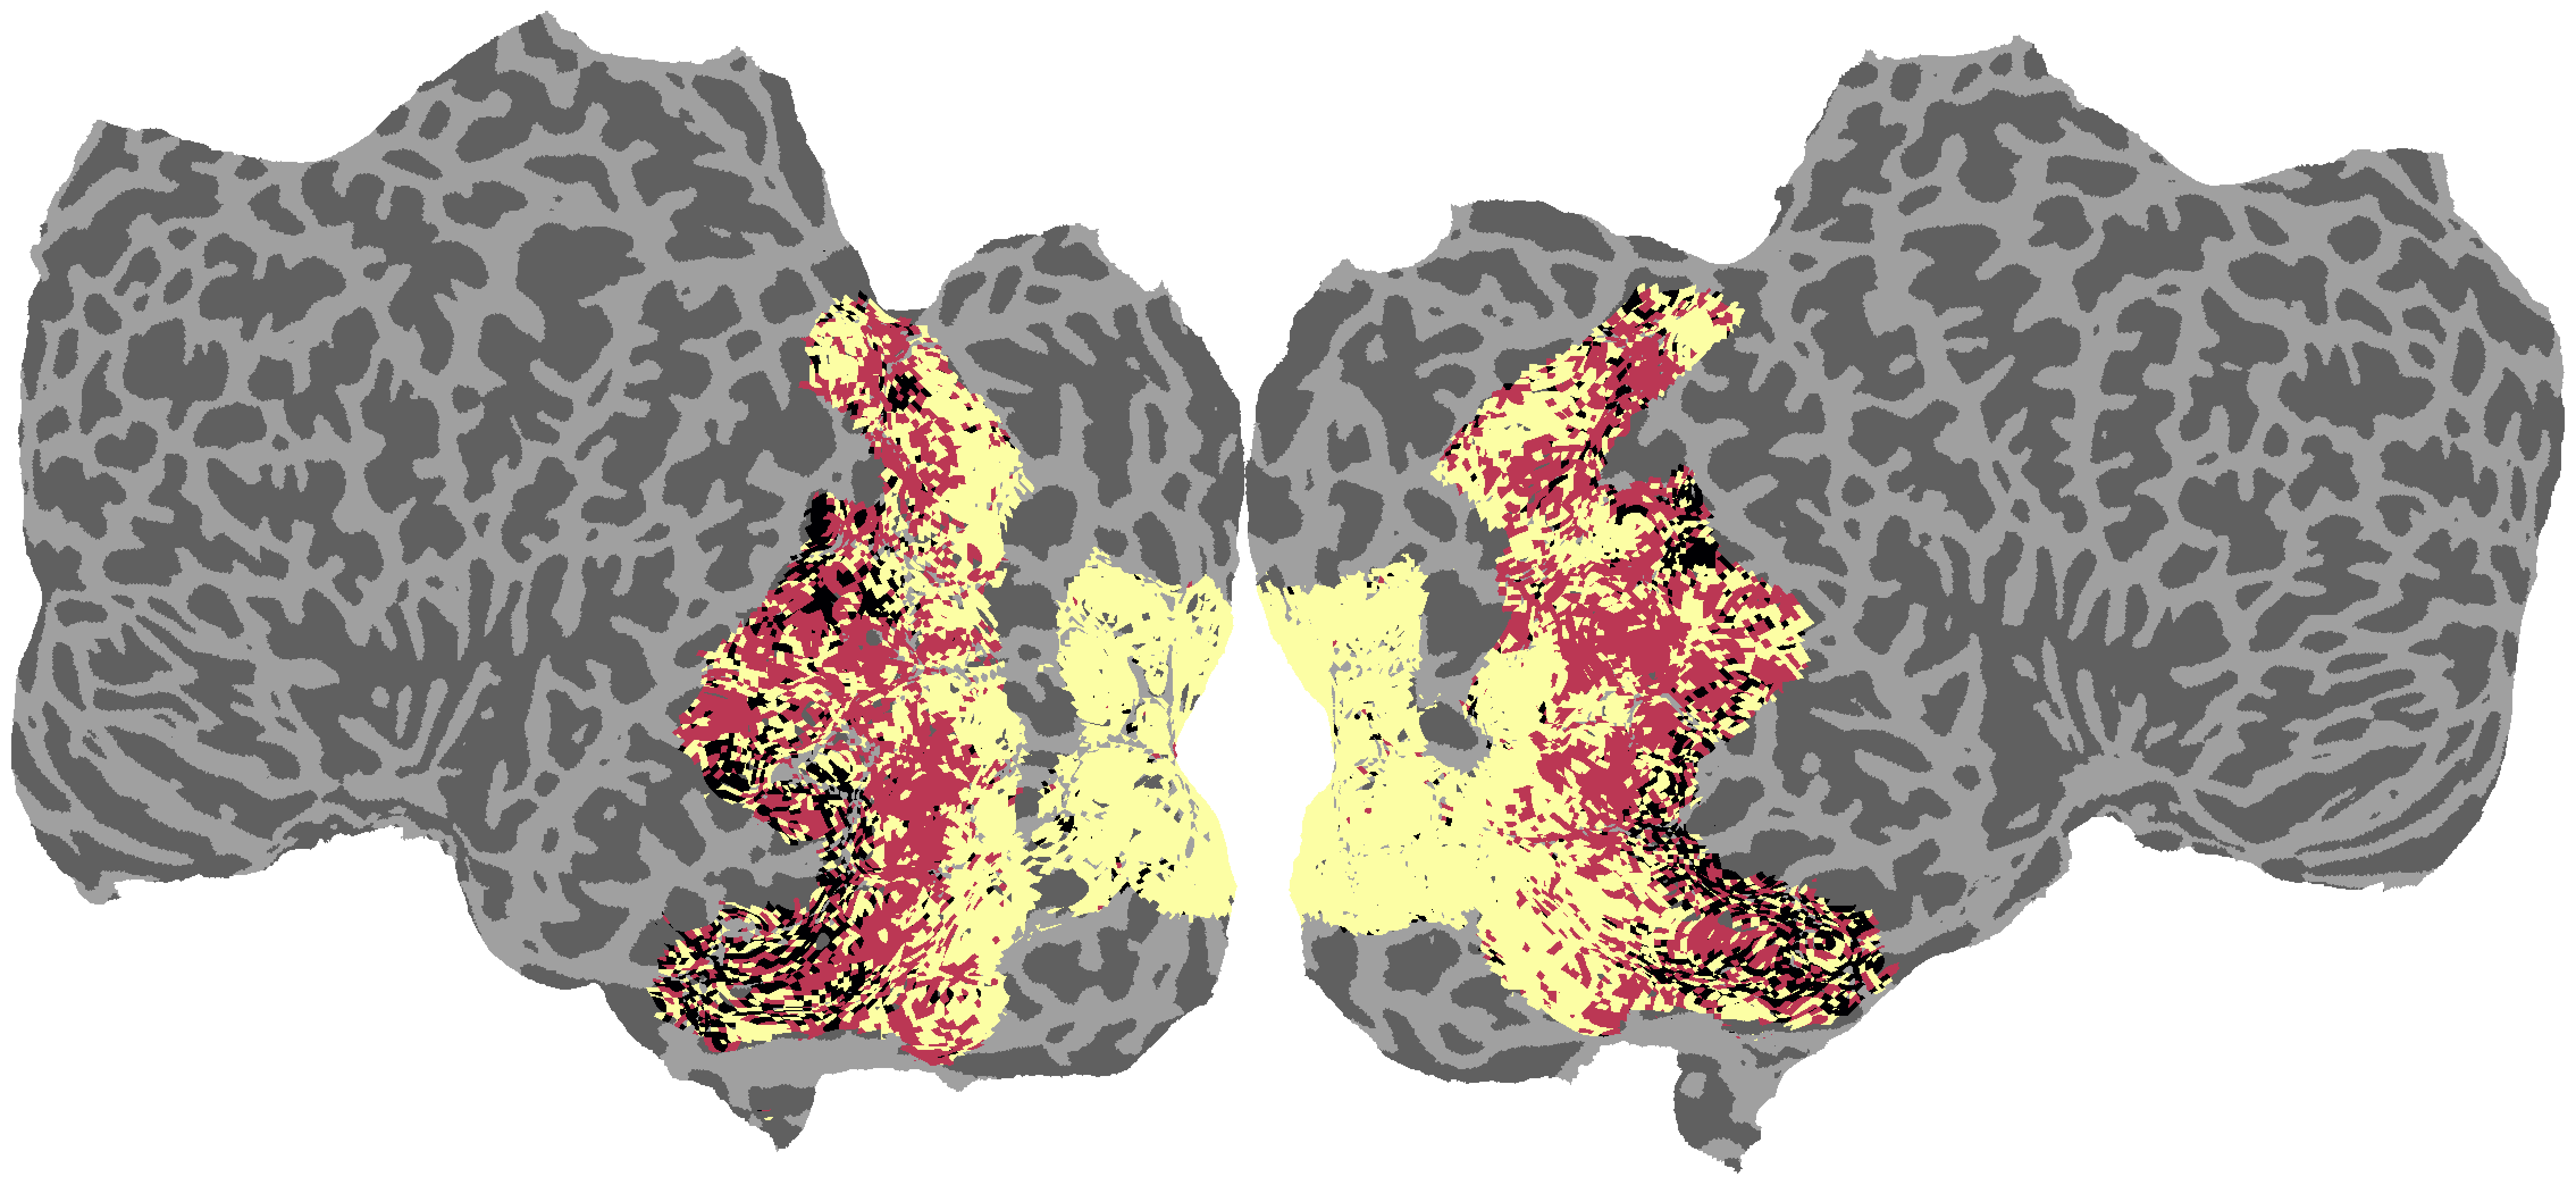

In [28]:
subj = 1
subject = "subj%02d"%subj
xfm = 'func1pt8_to_anat0pt8_autoFSbbr' 

basic_mask = np.load('data/masks/subj%d/cortical_mask_subj%02d.npy'%(subj, subj)) 
streams_mask = np.load('data/masks/subj%d/roi_1d_mask_subj%02d_streams.npy'%(subj, subj)) 
cortical_mask = np.load('data/masks/subj%d/cortical_mask_subj%02d.npy'%(subj, subj))


data_val = np.zeros(streams_mask.shape)
data_val[:] = np.nan
data_val[streams_mask == 5] = voxel_splits_ventral # 1: <=0 nc, 2: 'bad', 3: 'good'
data_val[streams_mask == 6] = voxel_splits_lateral
data_val[streams_mask == 7] = voxel_splits_dorsal

roi = 1 ## 1: V1v, 2: V1d, 3: V2v, 4: V2d, 5: V3v, 6: V3d, and 7: hV4
visualrois_mask = np.load('data/masks/subj%d/roi_1d_mask_subj%02d_prf-visualrois.npy'%(subj, subj))
data_val[visualrois_mask == roi] = voxel_splits_V1v

roi = 2 ## 1: V1v, 2: V1d, 3: V2v, 4: V2d, 5: V3v, 6: V3d, and 7: hV4
visualrois_mask = np.load('data/masks/subj%d/roi_1d_mask_subj%02d_prf-visualrois.npy'%(subj, subj))
data_val[visualrois_mask == roi] = voxel_splits_V1d

roi = 3 ## 1: V1v, 2: V1d, 3: V2v, 4: V2d, 5: V3v, 6: V3d, and 7: hV4
visualrois_mask = np.load('data/masks/subj%d/roi_1d_mask_subj%02d_prf-visualrois.npy'%(subj, subj))
data_val[visualrois_mask == roi] = voxel_splits_V2v

roi = 4 ## 1: V1v, 2: V1d, 3: V2v, 4: V2d, 5: V3v, 6: V3d, and 7: hV4
visualrois_mask = np.load('data/masks/subj%d/roi_1d_mask_subj%02d_prf-visualrois.npy'%(subj, subj))
data_val[visualrois_mask == roi] = voxel_splits_V2d

roi = 5 ## 1: V1v, 2: V1d, 3: V2v, 4: V2d, 5: V3v, 6: V3d, and 7: hV4
visualrois_mask = np.load('data/masks/subj%d/roi_1d_mask_subj%02d_prf-visualrois.npy'%(subj, subj))
data_val[visualrois_mask == roi] = voxel_splits_V3v

roi = 6 ## 1: V1v, 2: V1d, 3: V2v, 4: V2d, 5: V3v, 6: V3d, and 7: hV4
visualrois_mask = np.load('data/masks/subj%d/roi_1d_mask_subj%02d_prf-visualrois.npy'%(subj, subj))
data_val[visualrois_mask == roi] = voxel_splits_V3d

roi = 7 ## 1: V1v, 2: V1d, 3: V2v, 4: V2d, 5: V3v, 6: V3d, and 7: hV4
visualrois_mask = np.load('data/masks/subj%d/roi_1d_mask_subj%02d_prf-visualrois.npy'%(subj, subj))
data_val[visualrois_mask == roi] = voxel_splits_v4

new_data_val = data_val.copy()

new_mask = np.zeros(cortical_mask.shape) 
new_mask[:] = np.nan
new_mask[basic_mask] = new_data_val.copy()
new_mask = np.transpose(new_mask, (2, 1, 0)) 
vol_data_nan = cortex.Volume(new_mask.copy(), subject, xfm, vmin = 1, vmax = 3, cmap="inferno", with_curvature = True, with_sulci = True)

fig = cortex.quickflat.make_figure(vol_data_nan, sampler='nearest', thick = 1,with_colorbar=False,
                                       with_curvature=True,
                                       with_rois=False,
                                       with_labels=False,
                                      with_sulci=False)
plt.show()